# PyTorch: optim
--------------
A fully-connected ReLU network with one hidden layer, trained to predict y from $x^2$
with noise by minimizing squared Euclidean distance.

This implementation uses the nn package from PyTorch to build the network.

Rather than manually updating the weights of the model, we use the optim package `torch.optim.Adam` to define an Optimizer that will update the weights for us. The optim package defines many optimization algorithms that are commonly used for deep learning, including SGD+momentum, RMSProp, Adam, etc.

Modified based on [pytorch with examples](http://pytorch.org/tutorials/beginner/pytorch_with_examples.html#pytorch-optim)

In [1]:
import torch
from torch.autograd import Variable

In [2]:
# input data
n = 1000
x = torch.unsqueeze(torch.linspace(-1, 1, n), dim=1)  
y = x.pow(2) + 0.2*torch.rand(x.size()) 

x, y = torch.autograd.Variable(x), Variable(y)

In [3]:
# Create the model
model = torch.nn.Sequential(
    torch.nn.Linear(1, 100),
    torch.nn.ReLU(),
    torch.nn.Linear(100, 1),
)

In [4]:
# Define loss and optimizer
loss_fn = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [5]:
# Train
for t in range(10000):    
    y_pred = model(x)# Forward pass: compute predicted y by passing x to the model.   
    loss = loss_fn(y_pred, y)# Compute and print loss.
    optimizer.zero_grad()#zero all of the gradients
    loss.backward()# Backward pass
    optimizer.step()#makes an update to its parameters

In [6]:
# Test trained model
y_pred = model(x)

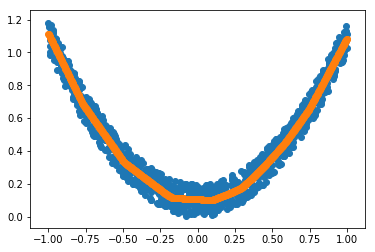

In [7]:
# Visualize prediction
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.scatter(x.data.numpy(), y.data.numpy())
ax.scatter(x.data.numpy(), y_pred.data.numpy())
plt.show()